In [1]:
# Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the stock symbols for 5 Nifty 50 stocks
stocks = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS', 'ITC.NS']

# Fetch historical data for the last 6 months
data = yf.download(stocks, period='6mo')

# Extract the 'Close' prices
close_prices = data['Close']

[*********************100%***********************]  5 of 5 completed


# Previously Complete Task 1 and Task 2

In [3]:
# 1.a. Calculate daily percentage change for each stock
daily_pct_change = close_prices.pct_change() * 100


'''Already Solved'''
# # 1.b. Plot closing prices and daily percentage changes
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14,10))

# # Plotting Closing Prices
# close_prices.plot(ax=ax1, title="Closing Prices of 5 Nifty 50 Stocks")
# ax1.set_ylabel('Price (INR)')

# # Plotting Daily Percentage Change
# daily_pct_change.plot(ax=ax2, title="Daily Percentage Change of 5 Nifty 50 Stocks")
# ax2.set_ylabel('Percentage Change (%)')

# plt.tight_layout()
# plt.show()

# # 1.c. Calculate the 20-day moving average and plot it against the stock's closing price
# for stock in stocks:
#     close_prices[stock].plot(label=f'{stock} Closing Price', figsize=(10,6))
#     close_prices[stock].rolling(window=20).mean().plot(label=f'{stock} 20-Day MA')

# plt.title("20-Day Moving Average vs Closing Prices")
# plt.legend()
# plt.show()

### Task 2.1 Simple Moving Average Crossover Strategy
# Choosing 'RELIANCE.NS' for the strategy
stock = 'RELIANCE.NS'

# Calculate the 50-day and 200-day moving averages
data['50_MA'] = close_prices[stock].rolling(window=50).mean()
data['200_MA'] = close_prices[stock].rolling(window=200).mean()

# # Plot the stock price with the two moving averages
# close_prices[stock].plot(label='Closing Price', figsize=(14,7))
# data['50_MA'].plot(label='50-Day MA')
# data['200_MA'].plot(label='200-Day MA')
# plt.title(f"{stock} - 50-Day vs 200-Day Moving Average")
# plt.legend()
# plt.show()

# 2.2. Backtest the strategy
# Buy when the 50-day MA crosses above the 200-day MA (bullish signal)
# Sell when the 50-day MA crosses below the 200-day MA (bearish signal)

data['Signal'] = 0  # No position initially
data['Signal'] = np.where(data['50_MA'] > data['200_MA'], 1, -1)  # 1 for Buy, -1 for Sell

# Shifting the signals to align with future returns
data['Position'] = data['Signal'].shift()

# Calculate the returns from the strategy
data['Strategy_Returns'] = data['Position'] * close_prices[stock].pct_change()

# 2.3 Calculate buy-and-hold returns
data['Buy_and_Hold_Returns'] = close_prices[stock].pct_change()

# # Plot the cumulative returns
# data[['Strategy_Returns', 'Buy_and_Hold_Returns']].cumsum().plot(figsize=(10,6), title=f"Cumulative Returns of Strategy vs Buy and Hold for {stock}")
# plt.show()


# Task 3.1

In [4]:
### Task 3.1: Calculate Maximum Drawdown
def max_drawdown(stock_prices):
    # Calculate the cumulative maximum of the closing prices
    cumulative_max = stock_prices.cummax()
    
    # Calculate the drawdown, which is the drop from the peak
    drawdown = (stock_prices - cumulative_max) / cumulative_max
    
    # Return the maximum drawdown (min drawdown value)
    max_dd = drawdown.min()
    
    return max_dd


# Calculate maximum drawdown for each stock in the list
for stock in stocks:
    max_dd = max_drawdown(close_prices[stock])
    print(f"Maximum Drawdown for {stock}: {max_dd * 100:.2f}%")

Maximum Drawdown for RELIANCE.NS: -9.59%
Maximum Drawdown for TCS.NS: -11.60%
Maximum Drawdown for INFY.NS: -13.04%
Maximum Drawdown for HDFCBANK.NS: -9.47%
Maximum Drawdown for ITC.NS: -5.93%


# TASK 3.2

In [5]:
### Task 3.2: Implement Stop-loss Mechanism for RELIANCE.NS

# Create a copy of the data to implement the stop-loss strategy
data_stop_loss = data.copy()

# Assume a stop-loss of 5%
stop_loss_threshold = 0.05

# Initialize necessary columns
data_stop_loss['Signal_Stop_Loss'] = 0
data_stop_loss['Position_Stop_Loss'] = np.nan  # Use NaN initially for holding period

# Implementing the stop-loss mechanism
buy_price = np.nan  # Placeholder for the buy price


In [6]:
# Loop over the rows to determine when to buy/sell based on crossover and stop-loss
for i in range(1, len(data_stop_loss)):
    if data_stop_loss['50_MA'][i] > data_stop_loss['200_MA'][i]:  # Buy signal (crossover)
        if np.isnan(buy_price):  # If no position, buy stock
            buy_price = close_prices[stock][i]
            data_stop_loss['Position_Stop_Loss'][i] = 1  # Enter long position
    elif buy_price and close_prices[stock][i] < (1 - stop_loss_threshold) * buy_price:  # Stop-loss triggered
        buy_price = np.nan  # Sell stock (stop loss)
        data_stop_loss['Position_Stop_Loss'][i] = -1  # Exit position
    elif data_stop_loss['50_MA'][i] < data_stop_loss['200_MA'][i]:  # Sell signal (crossover)
        buy_price = np.nan  # Sell stock
        data_stop_loss['Position_Stop_Loss'][i] = -1  # Exit position
    
    # Carry forward the previous position if no signal
    if np.isnan(data_stop_loss['Position_Stop_Loss'][i]):
        data_stop_loss['Position_Stop_Loss'][i] = data_stop_loss['Position_Stop_Loss'][i-1]

C:\Users\abhin\AppData\Local\Temp\ipykernel_10496\3194504536.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data_stop_loss['50_MA'][i] > data_stop_loss['200_MA'][i]:  # Buy signal (crossover)
C:\Users\abhin\AppData\Local\Temp\ipykernel_10496\3194504536.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif buy_price and close_prices[stock][i] < (1 - stop_loss_threshold) * buy_price:  # Stop-loss triggered
C:\Users\abhin\AppData\Local\Temp\ipykernel_10496\3194504536.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

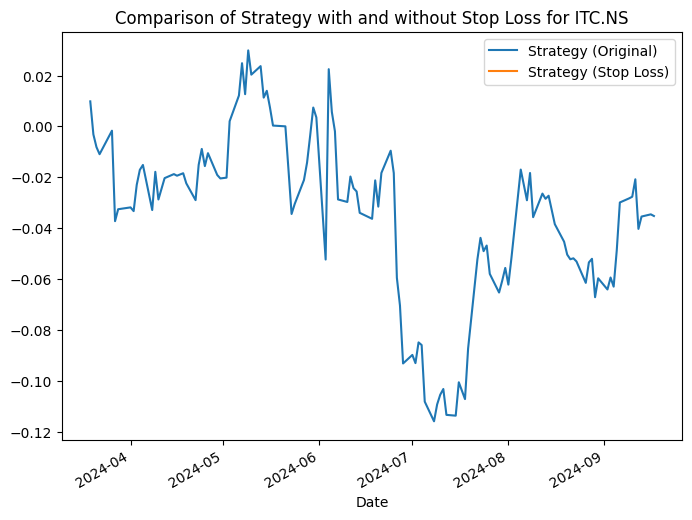

In [7]:
# Calculate the returns with stop-loss mechanism
data_stop_loss['Strategy_Returns_Stop_Loss'] = data_stop_loss['Position_Stop_Loss'].shift() * close_prices[stock].pct_change()

# Compare returns between original strategy and stop-loss strategy
cumulative_returns = pd.DataFrame({
    'Strategy (Original)': data['Strategy_Returns'].cumsum(),
    'Strategy (Stop Loss)': data_stop_loss['Strategy_Returns_Stop_Loss'].cumsum()
})

# Plot cumulative returns comparison
cumulative_returns.plot(figsize=(8,6), title=f"Comparison of Strategy with and without Stop Loss for {stock}")
plt.show()

In [8]:
# Output performance comparison
strategy_return = cumulative_returns['Strategy (Original)'].iloc[-1]
strategy_return_stop_loss = cumulative_returns['Strategy (Stop Loss)'].iloc[-1]
print(f"Total Return - Original Strategy: {strategy_return * 100:.2f}%")
print(f"Total Return - Strategy with Stop Loss: {strategy_return_stop_loss * 100:.2f}%")

Total Return - Original Strategy: -3.52%
Total Return - Strategy with Stop Loss: nan%
